In [11]:
%matplotlib inline
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, plot_roc_curve
import statsmodels.api as sm
from scipy.stats import ttest_ind
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split




geo = "GSE64591"

In [12]:
data = GEOparse.get_GEO(geo=geo, destdir="../Dataset/Wozniak2015", silent=True)

In [13]:
data.metadata["platform_id"][0]

'GPL18942'

### Reading in from external source

In [14]:
table = pd.read_csv("../Dataset/Wozniak2015/GSE64591_normalized.txt", sep="\t", header=7)
#table = pd.read_csv("../Dataset/Wozniak2015/GSE64591_non-normalized.txt", sep="\t", header=5)

In [15]:
mirnas = table.iloc[:, 0]
table = table.iloc[:, 1:].transpose()

In [18]:
[m for m in mirnas if "-155" in m]

['hsa-miR-155-002623']

In [6]:
len(mirnas)

350

In [10]:
list(data.gsms.values())[-40].metadata

{'title': ['NSCLC 61'],
 'geo_accession': ['GSM1574969'],
 'status': ['Public on Dec 31 2015'],
 'submission_date': ['Dec 30 2014'],
 'last_update_date': ['Dec 31 2015'],
 'type': ['RNA'],
 'channel_count': ['1'],
 'source_name_ch1': ['plasma'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['gender: Male',
  'age at interview: 55',
  'smoking status: Ever smoker',
  'morphology (for patients only): 8140/3',
  'disease state: Non-small cell lung cancer patient'],
 'treatment_protocol_ch1': ['Peripheral blood was collected in EDTA tubes at the time of interview.'],
 'growth_protocol_ch1': ['n/a'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['Total RNA was isolated from 300ï\xadL of plasma using NucleoSpinÂ® miRNA Plasma kit (Macherey-Nagel, DÃ¼ren, Germany) according to the manufacturerâ€™s protocol with Proteinase K digest, addition of 2Î¼g of glycogen carrier and DNAse digest steps. All samples were spiked-in with 10pmol of Arabidopsi

### T-test

In [94]:
X = table

In [95]:
X_healthy, X_cancer = X[:100], X[100:]

In [96]:
results = ttest_ind(X_healthy, X_cancer).pvalue

In [97]:
lowest, pvalues = np.argsort(results)[:5], np.sort(results)[:5]

In [98]:
mirnas[lowest], pvalues

(106        hsa-miR-218-000521
 293       hsa-miR-340#-002259
 160    hsa-miR-450b-5p-002207
 96        hsa-miR-200c-002300
 205        hsa-miR-642-001592
 Name: ID_REF, dtype: object,
 array([3.06930673e-06, 5.41324041e-06, 1.70091386e-05, 5.78109257e-05,
        2.61842093e-04]))

### F-test

In [99]:
t3 = table

In [100]:
f, p = f_classif(t3, 100*[0] + 100*[1])

### ANOVA

In [101]:
t3

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
CRTL 1,27.25,36.71,31.79,32.27,31.85,25.28,21.44,22.90,29.82,32.12,...,30.93,11.58,24.80,26.70,27.32,27.84,28.12,28.95,25.12,19.13
CRTL 2,27.39,32.81,30.92,30.30,26.65,24.64,21.95,20.86,28.30,32.61,...,30.83,9.01,25.44,26.01,26.88,27.84,27.49,28.82,26.47,35.89
CRTL 3,30.97,32.95,34.10,34.39,31.73,27.47,22.90,24.06,31.03,33.20,...,29.43,11.58,26.88,26.70,29.55,27.84,28.12,27.49,25.44,22.02
CRTL 4,25.38,33.99,33.73,33.82,32.95,25.18,23.37,22.74,30.50,31.98,...,31.63,11.58,24.04,25.12,26.70,28.54,28.24,27.32,25.73,36.53
CRTL 5,36.78,36.78,28.97,29.87,36.78,28.81,22.74,23.67,31.79,36.78,...,28.24,15.25,32.83,36.42,9.01,32.44,24.80,19.13,24.04,36.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NSCLC 96,29.95,37.32,31.15,30.35,33.54,26.15,23.94,24.41,30.87,37.32,...,32.94,10.75,26.88,22.89,29.74,27.49,25.73,28.12,26.47,31.75
NSCLC 97,28.11,38.98,30.41,30.00,38.98,26.15,22.90,23.37,30.16,34.60,...,29.83,12.50,28.24,25.44,29.43,27.66,27.32,20.71,26.01,17.63
NSCLC 98,26.24,33.73,31.76,32.12,30.76,25.38,19.62,20.04,28.17,29.67,...,28.24,12.50,22.89,25.12,27.49,39.99,31.63,27.09,22.02,33.07
NSCLC 99,29.95,38.35,32.34,33.63,29.51,25.96,20.47,21.16,27.47,31.60,...,33.61,10.75,25.44,28.95,28.41,27.98,28.54,29.74,26.88,14.23


In [102]:
X = np.array(100*[0] + 100*[1]).reshape(-1, 1)

In [103]:
linreg = LinearRegression()
linreg.fit(X, t3)

LinearRegression()

In [104]:
fitted = linreg.predict(X)
explained_variance_score(t3, fitted, multioutput="variance_weighted")

0.007093279213505511

### Mean-variance-plot

In [105]:
np.mean(table)

0      28.97075
1      35.30615
2      31.34230
3      31.41905
4      33.30520
         ...   
345    28.96770
346    28.08465
347    27.27385
348    24.33615
349    23.13760
Length: 350, dtype: float64

In [106]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [107]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

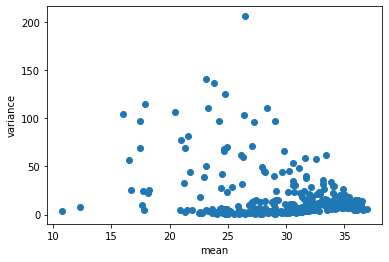

In [108]:
mean_variance_plot(table)

In [109]:
norm_log_table = table - np.mean(table)

In [110]:
norm_log_table /= np.sqrt(np.mean(np.var(table, ddof=1)))

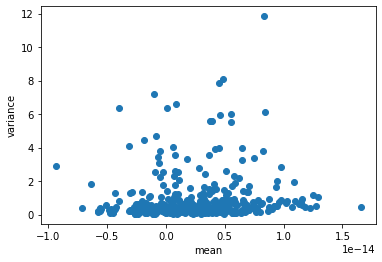

In [111]:
mean_variance_plot(norm_log_table)

### PCA

In [112]:
pca = decomposition.PCA(n_components=10)

In [113]:
pca.fit(norm_log_table)

PCA(n_components=10)

In [114]:
pca.explained_variance_ratio_

array([0.17919158, 0.08831582, 0.06164837, 0.03834048, 0.02825164,
       0.02396395, 0.02158986, 0.01981144, 0.01867752, 0.01713379])

In [115]:
components = pca.transform(norm_log_table)

In [116]:
components

array([[ 0.1081389 , -6.94505038,  3.1676522 , ..., -1.81432082,
        -2.06527009, -0.78575977],
       [-2.21500124,  0.24383309,  3.21321047, ...,  7.07919348,
         4.6210699 , -2.92333616],
       [ 1.75917101, -7.06455242, -0.29196824, ...,  0.81376781,
        -3.68435096, -1.39298883],
       ...,
       [ 3.22406363, -1.7752188 , 10.33902363, ...,  2.61321106,
         6.66127461, -2.20346459],
       [-8.89487041,  5.17478086,  0.45973379, ...,  1.51696513,
        -1.29351017,  0.7396624 ],
       [-9.6230713 ,  2.2921703 , -2.12548701, ..., -4.3424153 ,
        -2.19908614,  1.96230282]])

In [117]:
list(data.gsms.values())[100].metadata

{'title': ['NSCLC 1'],
 'geo_accession': ['GSM1574909'],
 'status': ['Public on Dec 31 2015'],
 'submission_date': ['Dec 30 2014'],
 'last_update_date': ['Dec 31 2015'],
 'type': ['RNA'],
 'channel_count': ['1'],
 'source_name_ch1': ['plasma'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['gender: Male',
  'age at interview: 68',
  'smoking status: Ever smoker',
  'morphology (for patients only): 8070/3',
  'disease state: Non-small cell lung cancer patient'],
 'treatment_protocol_ch1': ['Peripheral blood was collected in EDTA tubes at the time of interview.'],
 'growth_protocol_ch1': ['n/a'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['Total RNA was isolated from 300ï\xadL of plasma using NucleoSpinÂ® miRNA Plasma kit (Macherey-Nagel, DÃ¼ren, Germany) according to the manufacturerâ€™s protocol with Proteinase K digest, addition of 2Î¼g of glycogen carrier and DNAse digest steps. All samples were spiked-in with 10pmol of Arabidopsis

In [118]:
controls = np.array(["CRTL" in k.metadata["title"][0] for k in list(data.gsms.values())])

In [119]:
sum(controls)

100

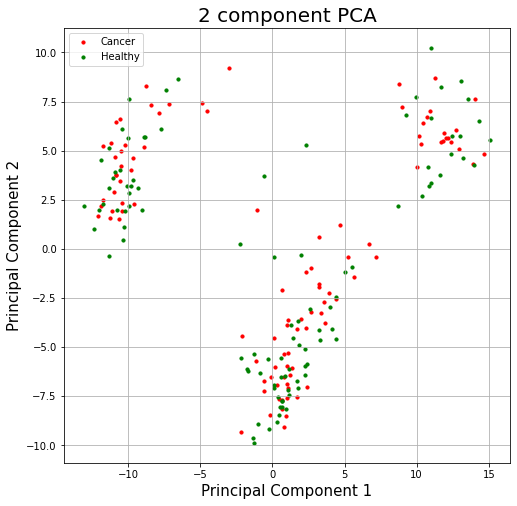

In [120]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

In [121]:
components2 = components[components[:,0] < 20, :]
controls2 = controls[components[:,0] < 20]

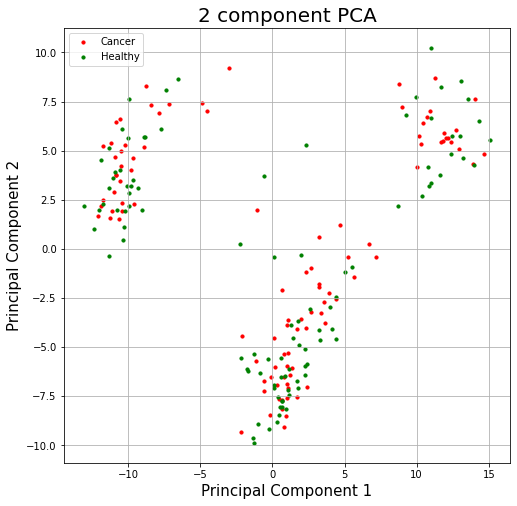

In [122]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components2[controls2 == False, 0], components2[controls2 == False, 1], c = 'r', s = 10)
ax.scatter(components2[controls2 == True, 0], components2[controls2 == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Linear regression adjustments

In [123]:
sex = np.array(["Female" in k.metadata["characteristics_ch1"][0] for k in list(data.gsms.values())])
age = np.array([float(k.metadata["characteristics_ch1"][1].split(": ")[1].replace("NA", "NaN")) for k in list(data.gsms.values())])
smoke = np.array(["Ever" in k.metadata["characteristics_ch1"][2] for k in list(data.gsms.values())])

In [124]:
covars = pd.DataFrame(np.array([sex, age, smoke]).transpose(), columns=["sex", "age", "smoke"])

In [125]:
covars = covars.fillna(covars.mean())

In [126]:
linreg = LinearRegression()
linreg.fit(covars, norm_log_table)

LinearRegression()

In [127]:
adj_norm_log_table = norm_log_table - linreg.predict(covars)

# PCA

In [128]:
pca = decomposition.PCA(n_components=10)

In [129]:
pca.fit(adj_norm_log_table)

PCA(n_components=10)

In [130]:
components = pca.transform(adj_norm_log_table)

In [131]:
components

array([[-0.37671467,  6.82068277,  3.29841122, ..., -2.19195628,
        -2.05235235, -0.8748464 ],
       [-2.82548579, -0.14969314,  3.57208201, ...,  6.82508856,
         5.21820521, -2.58336842],
       [ 2.24952477,  7.2383756 , -0.68671296, ...,  1.08169916,
        -3.3177152 , -1.44960377],
       ...,
       [ 1.91799418,  1.4405175 , 11.18650878, ...,  2.43378692,
         7.18707418, -1.13205198],
       [-8.95490863, -5.31135489,  0.72112863, ...,  1.18927535,
        -1.45055712,  0.25750682],
       [-8.86264145, -2.11723834, -2.45763803, ..., -3.53658611,
        -2.44405059,  1.84934943]])

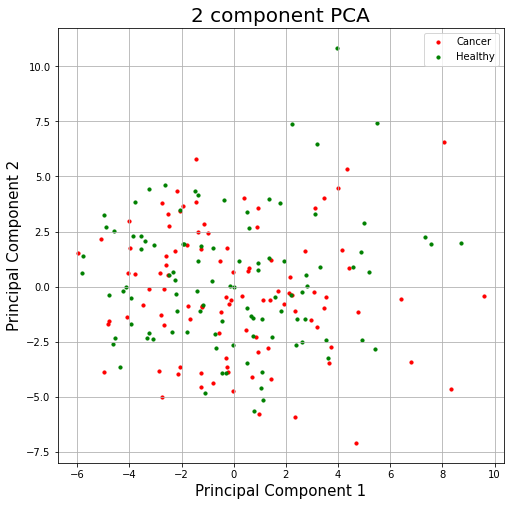

In [132]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 4], components[controls == False, 5], c = 'r', s = 10)
ax.scatter(components[controls == True, 4], components[controls == True, 5], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Logistic Regression

In [133]:
X_train, X_test, y_train, y_test = train_test_split(adj_norm_log_table, controls, test_size=0.33, random_state=42)

In [134]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


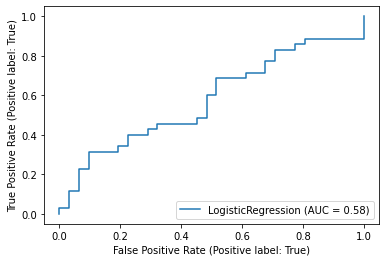

In [135]:
plot_roc_curve(model, X_test, y_test)

### XGBoost

In [136]:
X_train, X_test, y_train, y_test = train_test_split(norm_log_table, controls, test_size=0.33, random_state=42)

In [137]:
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

[15:35:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

C:\Users\Ole Fredrik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


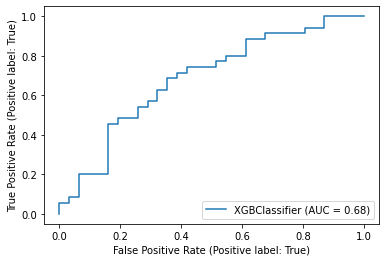

In [138]:
plot_roc_curve(model, X_test, y_test)

### Export data

In [139]:
lookup_table = pd.read_csv("../Others/taqman.csv", index_col=2)
lookup_table.head()

,Well Number,Well Name,Assay Name,Control Assay,Assay Target Sequence,miRBase ID (v22),miRBase Alias
Assay ID,,,,,,,
377,1,A1,hsa-let-7a,NaN,UGAGGUAGUAGGUUGUAUAGUU,hsa-let-7a-5p,hsa-let-7a(17)
379,2,A2,hsa-let-7c,NaN,UGAGGUAGUAGGUUGUAUGGUU,hsa-let-7c-5p,hsa-let-7c(19)
2283,3,A3,hsa-let-7d,NaN,AGAGGUAGUAGGUUGCAUAGUU,hsa-let-7d-5p,hsa-let-7d(17)
2406,4,A4,hsa-let-7e,NaN,UGAGGUAGGAGGUUGUAUAGUU,hsa-let-7e-5p,hsa-let-7e(17)
382,5,A5,hsa-let-7f,NaN,UGAGGUAGUAGAUUGUAUAGUU,hsa-let-7f-5p,hsa-let-7f(17)


In [140]:
lookup_table = lookup_table.drop_duplicates("Assay Target Sequence")

In [141]:
len(lookup_table)

758

In [142]:
mirnas[:10]

0     hsa-let-7a-000377
1    hsa-miR-10b-002218
2        U6snRNA-001973
3        U6snRNA-001973
4    hsa-miR-15a-000389
5    hsa-miR-15b-000390
6     hsa-miR-16-000391
7     hsa-miR-17-002308
8    hsa-miR-18a-002422
9    hsa-miR-18b-002217
Name: ID_REF, dtype: object

In [143]:
mirnas = [int(m[-6:]) for m in mirnas]
mirnas[:10]

[377, 2218, 1973, 1973, 389, 390, 391, 2308, 2422, 2217]

In [144]:
sequences = lookup_table.loc[mirnas]["Assay Target Sequence"]

In [145]:
len(mirnas)

350

In [146]:
len(sequences)

350

In [147]:
adj_norm_log_table.columns = sequences
adj_norm_log_table *= -1
adj_norm_log_table = adj_norm_log_table.loc[:,~adj_norm_log_table.columns.duplicated()]
adj_norm_log_table["cancer"] = 1 - controls
adj_norm_log_table.head()

Assay Target Sequence,UGAGGUAGUAGGUUGUAUAGUU,UACCCUGUAGAACCGAAUUUGUG,GUGCUCGCUUCGGCAGCACAUAUACUAAAAUUGGAACGAUACAGAGAAGAUUAGCAUGGCCCCUGCGCAAGGAUGACACGCAAAUUCGUGAAGCGUUCCAUAUUUU,UAGCAGCACAUAAUGGUUUGUG,UAGCAGCACAUCAUGGUUUACA,UAGCAGCACGUAAAUAUUGGCG,CAAAGUGCUUACAGUGCAGGUAG,UAAGGUGCAUCUAGUGCAGAUAG,UAAGGUGCAUCUAGUGCAGUUAG,UGUGCAAAUCUAUGCAAAACUGA,...,ACCCGUCCCGUUCGUCCCCGGA,UCUCGCUGGGGCCUCCA,AUCCCACCUCUGCCACCA,UAUUCAUUUAUCCCCAGCCUACA,UCCAGUGCCCUCCUCUCC,UCACUGUUCAGACAGGCGGA,GUCCCUGUUCAGGCGCCA,UCCCUGUUCGGGCGCCA,CCUGUUGAAGUGUAAUCCCCA,cancer
CRTL 1,0.377522,-0.386196,-0.063276,0.335690,0.300612,0.028797,-0.041859,0.121493,0.515646,-0.014927,...,1.532646,0.275397,-0.153296,0.471052,0.145859,-0.007844,-0.379683,-0.113385,0.930134,0
CRTL 2,0.505069,0.744009,0.034816,1.605951,0.427841,-0.216751,0.384034,0.472392,0.293792,-2.237091,...,2.186778,0.091824,-0.207593,0.782031,0.558211,0.165247,-0.398491,-0.617123,-3.107896,0
CRTL 3,-0.307447,0.618340,-0.771592,0.420418,-0.297135,-0.347554,-0.388340,-0.292331,0.201967,-0.103378,...,1.114928,-0.305076,-0.314331,-0.079802,0.495541,-0.020508,-0.085892,-0.451582,0.381920,0
CRTL 4,0.765443,0.338934,-0.551168,0.071652,0.292815,-0.437167,-0.031403,-0.075011,0.524787,-0.362966,...,1.430779,0.427713,0.184228,0.634471,0.099622,-0.032072,-0.018262,-0.300211,-3.238515,0
CRTL 5,-1.579118,-0.446276,0.503607,-0.788109,-0.554608,-0.301893,-0.239185,-0.407129,-0.606770,0.020219,...,0.439581,-1.670833,-2.560704,4.810354,-0.849173,0.765706,1.974619,-0.034813,-3.065727,0


In [148]:
adj_norm_log_table.to_csv("../TransformedData/Wozniak2015_adjusted.csv", index=False)